## Importing necessary Libraries

In [33]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline

# Train Datasets used for analysis

In [34]:
train = pd.read_csv('train.csv')
train_original = train.copy()
train_original

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [35]:
train.shape

(31962, 3)

# Test datasets used for analysis

In [36]:
test = pd.read_csv('test.csv')
test_original = test.copy()
test_original

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Combine Train and Test datasets for pre-processing stage

In [37]:
combine = train.append(test, ignore_index = True, sort = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [38]:
combine = pd.concat([train, test], ignore_index=True, sort=True)

In [39]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [40]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


# Removing Twitter Handles (@User)

In [41]:
def remove_pattern(text,pattern):
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
        
    return text

In [42]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


# Removing Punctuations, Numbers, and SpecialCharacters

In [43]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [44]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


# Removing Short Words
to remove words having length 3 or less

In [45]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talking before they leave. cha...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams.ð¯ can't think a...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,won!!! love land!!! #allin #cavs #champions #c...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here it's #gr8


# Tokenization

In [46]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Tidy_Tweets, dtype: object

# Stemming
Stemming is a rule-based process of stripping the suffixes ("ing", "ly", "es", "s" etc) from a word. For example-"play","player","played","plays" and "playing" are the different variations of the word- "play"

In [47]:
from nltk import PorterStemmer

ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Tidy_Tweets, dtype: object

### Stich tokens together back

In [48]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


# Visualization from Tweets

## Word Cloud
Most freq words appear in large size and less frequent words appear in smaller sizes

In [49]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

#### Store all the words from the dataset which are non-racist/sexist

In [51]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])
all_words_positive

'when father dysfunct selfish drag kid into dysfunction. #run thank #lyft credit can\'t caus they don\'t offer wheelchair van pdx. #disapoint #getthank bihday your majesti #model love take with time urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦ factsguide: societi #motiv [2/2] huge fare talk befor they leave. chao disput when they there. #allshowandnogo camp tomorrow dannyâ\x80¦ next school year year exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exam #hate #imagin #actorslif #revolutionschool #girl won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali welcom here it\' #gr8 #ireland consum price index (mom) climb from previou 0.2% 0.5% #blog #silver #gold #forex selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today!! #80day #gettingf ouch...junior angryð\x9f\x98\x90#got7 #junior #yugyoem #omg thank have paner. #thank #posit #friday! ð\x9f\

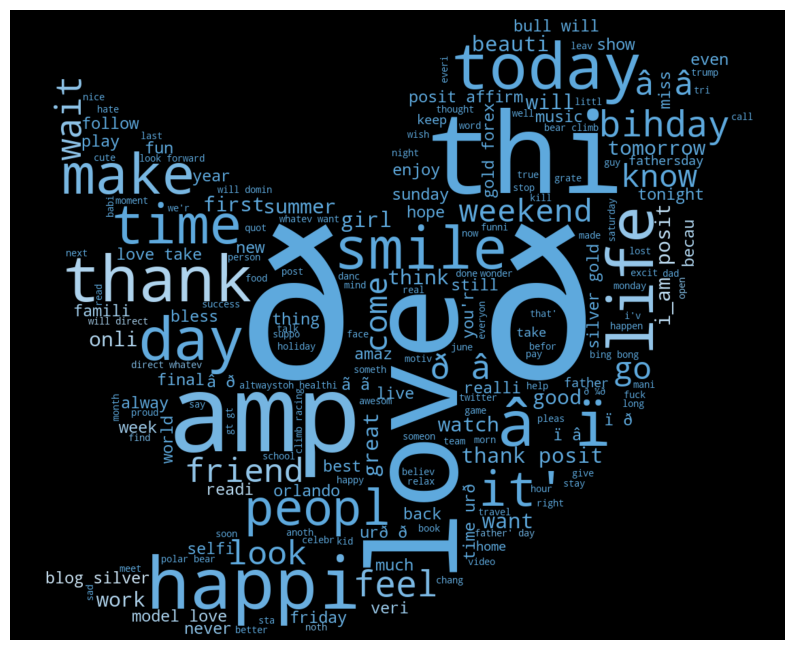

In [52]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### Store all the words from the dataset which are racist/sexist

In [53]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])
all_words_negative

'#cnn call #michigan middl school \'build wall\' chant #tcot comment! #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin retweet agree! lumpi say prove lumpy. it\' unbeliev that 21st centuri we\'d need someth like this. again. #neverump #xenophobia let fight against #love #peac ð\x9f\x98©the white establish can\'t have folx run around love themselv promot great hey, white people: call peopl \'white\' #race #ident #medâ\x80¦ #altright use &amp; insecur lure into #whitesupremaci interest #linguist that doesn\'t address #race &amp; racism about #power. #raciolinguist bringsâ\x80¦ mock obama be black. #brexit #peopl aren\'t protest #trump becaus #republican won-they becaus trump fuher &amp;â\x80¦ it\' when call #michelleobama gorilla becaus racist have long thought black peopl betâ\x80¦ smaller hand show, barri probabl lie about be #knick game suck more than #golfâ\x80¦ point finger million point right back you, #jewishsupremacist might libtard if... #libtard #

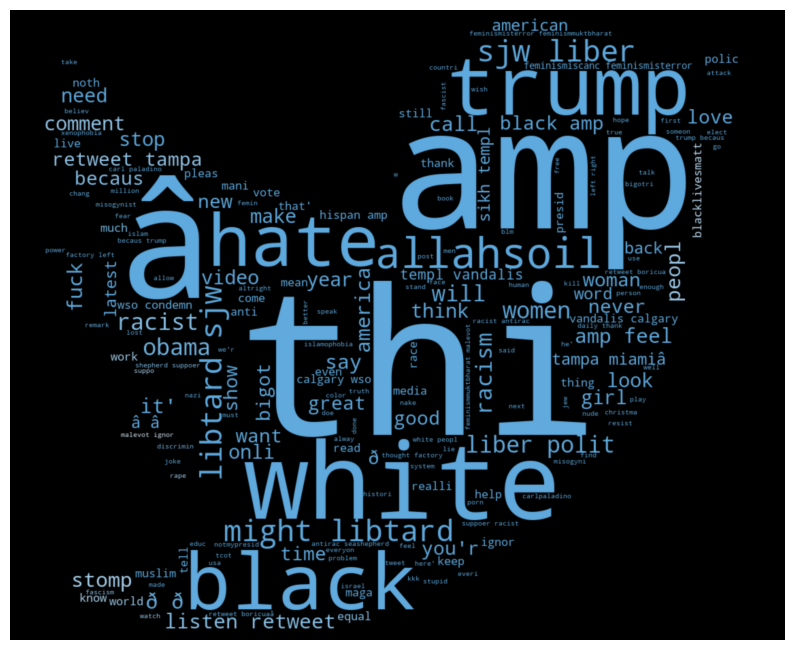

In [54]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func = image_colors), interpolation="gaussian")

plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

In [55]:
def Hashtags_Extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

In [56]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [57]:
ht_positive_unnest = sum(ht_positive,[])

In [58]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [59]:
ht_negative_unnest = sum(ht_negative,[])

## Positive Tweets in dataset

#### Counting Frequency of the words having Positive Sentiments

In [60]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [61]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
5,motiv,195
6,allshowandnogo,1
7,school,27
8,exam,8
9,hate,26


### Plotting barplot for the 10 most frequent words

In [62]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

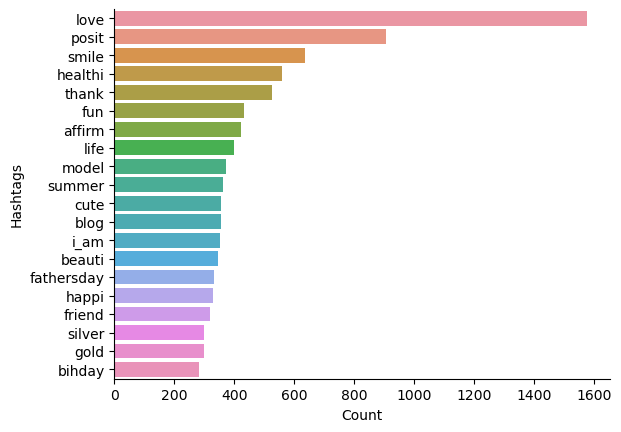

In [63]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

# Negative Tweets in dataset

#### Counting Freq of words having negative sentiments

In [64]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [65]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


In [66]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

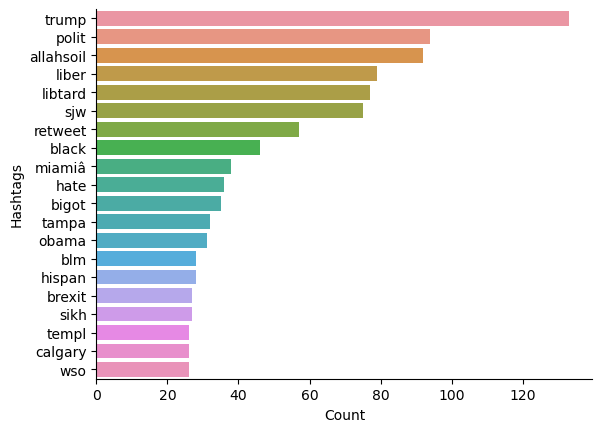

In [67]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

### Bag of Words
Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-

    D1: He is a lazy boy. She is also lazy.
    D2: Smith is a lazy person.


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Features
Tf-idf stands for term frequency-inverse document frequency. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.
The first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document.
The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.
TF: Term Frequency, which measures how frequently a term occurs in a document.
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
IDF: Inverse Document Frequency, which measures how important a term is.
However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance.
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000,stop_words='english')
tfidf_matrix = tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning Models

In [70]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
from sklearn.model_selection import train_test_split

#### Bag of Words Feature

In [73]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

#### TF-IDF Feature

In [74]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
Log_Reg = LogisticRegression(random_state=0, solver='lbfgs')

### Using Bag-Of-Words Features

In [77]:
Log_Reg.fit(x_train_bow, y_train_bow)

LogisticRegression(random_state=0)

In [78]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[9.88522656e-01, 1.14773438e-02],
       [9.99902158e-01, 9.78419715e-05],
       [9.03848760e-01, 9.61512398e-02],
       ...,
       [7.06602565e-01, 2.93397435e-01],
       [9.43206058e-01, 5.67939417e-02],
       [9.63526312e-01, 3.64736878e-02]])

#### Calculating F1 Score

In [79]:
from sklearn.metrics import f1_score

In [80]:
prediction_int = prediction_bow[:,1]>=0.3 
prediction_int= prediction_int.astype(np.int64)
prediction_int

log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.584070796460177

### Using TF-IDF

In [81]:
Log_Reg.fit(x_train_tfidf, y_train_tfidf)

LogisticRegression(random_state=0)

In [82]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.98359438, 0.01640562],
       [0.98185847, 0.01814153],
       [0.91844664, 0.08155336],
       ...,
       [0.96093067, 0.03906933],
       [0.93586749, 0.06413251],
       [0.97920102, 0.02079898]])

In [83]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int64)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5861486486486487

# XGBoost

In [84]:
from xgboost import XGBClassifier

In [85]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
from xgboost import XGBClassifier

In [87]:
model_bow = XGBClassifier(random_state=22, learning_rate = 0.9)

In [88]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=22, ...)

In [89]:
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9187911e-01, 8.1209205e-03],
       [9.9935114e-01, 6.4886967e-04],
       [9.3785286e-01, 6.2147118e-02],
       ...,
       [9.4486654e-01, 5.5133436e-02],
       [9.3785286e-01, 6.2147118e-02],
       [9.3785286e-01, 6.2147118e-02]], dtype=float32)

In [90]:
xgb = xgb[:,1]>=0.3
xgb_int = xgb.astype(np.int64)
xgb_bow=f1_score(y_valid_bow,xgb_int)
xgb_bow

0.588144726712856

### Using TF-IDF Features

In [92]:
model_tfidf = XGBClassifier(random_state=29, learning_rate=0.7)

In [93]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=29, ...)

In [98]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.9985354 , 0.00146458],
       [0.99644077, 0.00355925],
       [0.95706755, 0.04293242],
       ...,
       [0.90701455, 0.09298544],
       [0.95706755, 0.04293242],
       [0.9958374 , 0.0041626 ]], dtype=float32)

In [106]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf = xgb_tfidf>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int64)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)
score

0.5736196319018405

# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using bag of words

In [109]:
dct.fit(x_train_bow, y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [110]:
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [111]:
dct_bow = dct_bow[:,1]>=0.3
dct_int_bow = dct_bow.astype(np.int64)
dct_score_bow = f1_score(y_valid_bow, dct_int_bow)
dct_score_bow

0.5024691358024691

### Using TF-IDF

In [112]:
dct.fit(x_train_tfidf, y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [113]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [114]:
dct_tfidf = dct_tfidf[:,1]>=0.3
dct_int_tfidf = dct_tfidf.astype(np.int64)
dct_score_tfidf = f1_score(y_valid_tfidf, dct_int_tfidf)
dct_score_tfidf

0.5397324940991345

# Model Comparison

In [115]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [116]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]
compare = pd.DataFrame({'Model':Algo,'F1_Score':score},index = [i for i in range(1,7)])

In [117]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.584071,0.588145,0.502469,0.586149,0.57362,0.539732


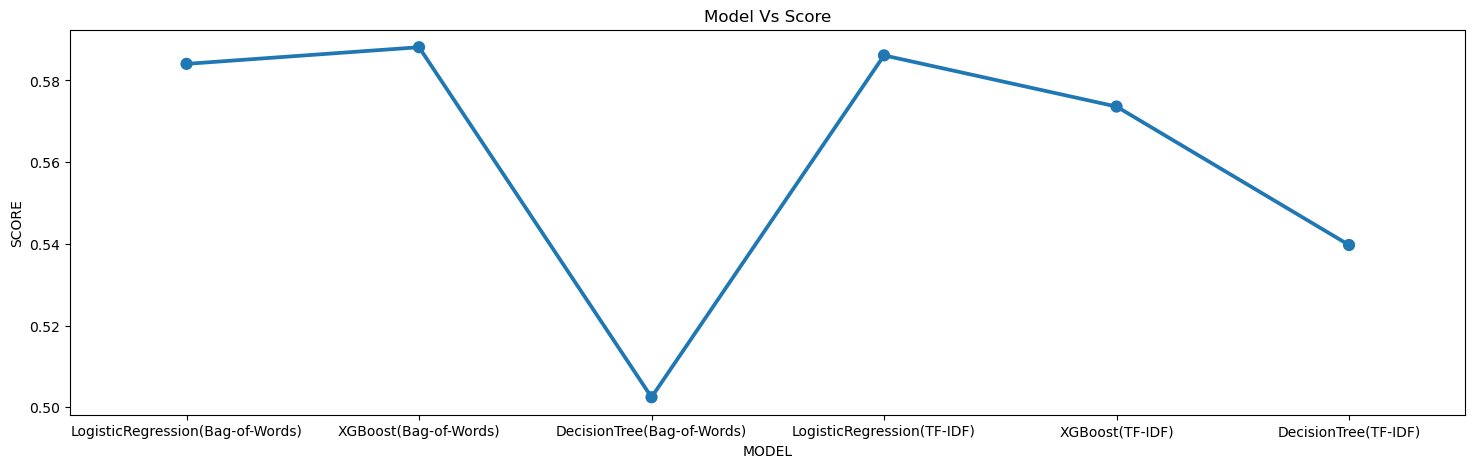

In [118]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [119]:
test_tfidf = tfidf_matrix[31962:]

In [121]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int64)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

In [122]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


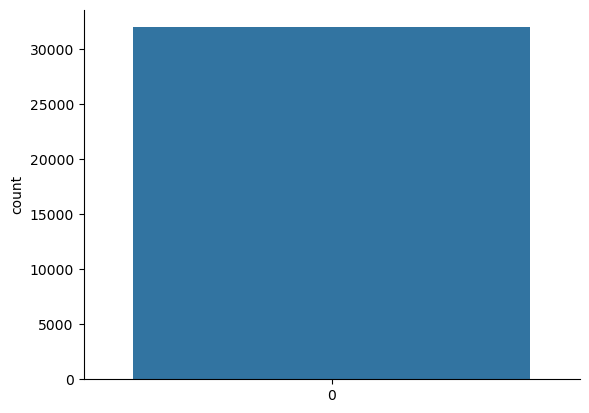

In [123]:
sns.countplot(train_original['label'])
sns.despine()